## ML Lab AI22

The purpose of this lab is to use the tools you have learned in machine learning to gain knowledge and apply them to various types of problems that you may encounter in the industry. Note that the algorithms and models we build here will be simple, and it is not uncommon in the industry to combine multiple models in solutions. The point of this lab is to gain an understanding of how to approach different types of problems using machine learning.

## Parts

1. Recommender system
2. Disease prediction

## Recommender system
When you watch Youtube, order food online, buy books online, listen to Spotify, use LinkedIn, you constantly receive recommendations for new videos, dishes, etc. What is behind these recommendations is a type of <a href="https://en.wikipedia.org/wiki/Recommender_system">recommender system</a>.

## 1.0 Warm up
Börja med att kolla på <a href="https://www.youtube.com/watch?v=4Ws0oPH350U">denna youtube-video</a> och följ efter i kod för att skapa ett enkelt recommender system för filmer med hjälp av KNN. Datasetet som används i videon är från movielens small som består av 100,000 ratings på 9000 filmer och 600 användare.


## 1.1 Movielens full - EDA
Nu ska du ladda ned datasetet <a href="https://grouplens.org/datasets/movielens/">ml-latest.zip</a> under sektionen "recommended for education and development". Läs in dataseten "movies.csv" och "ratings.csv" besvara på följande frågorna nedan.

a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan, utan försök undersöka fler aspekter av datan.

b) Vilka är de 10 filmerna med flest ratings?

c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.

d) Gör en plot över årtal och antalet filmer representerade i datasetet. 

e) Gör en plot över antalet ratings mot movieId.

f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över dessa.

<div style="display: flex; flex-direction: row; padding: 40px; margin: 20px;">
  <div style="flex: 1;">

<h2>df_ratings.info()</h2>

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 317.6 MB
```

  </div>

  <div style="flex: 1;">

<h2>df_movies.info()</h2>

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int32 
 1   title    58098 non-null  object
dtypes: int32(1), object(1)
memory usage: 681.0+ KB
````

  </div>

</div>

Memory usage is relatively high for ratings (300 MB), given that it's almost 28 million entries, we could (or should?) reduce this in some way.

Also, strings need formatting, issues with 'The,' ?? Is it only 'The' causing issues - gotta check that out later

ohhh never mind just realized why that *issue* isn't an issue, but a *feature*, because searching for titles you don't search with 'The' for many movies.. i think?? anyway

In [104]:
import pandas as pd
import numpy as np

movies='../Data/ml-latest/movies.csv'
ratings='../Data/ml-latest/ratings.csv'

df_movies=pd.read_csv(movies, usecols=['movieId','title'],
    dtype={
        'movieId':'int32',
        'title':'str',
        }
    )

df_ratings=pd.read_csv(ratings, usecols=['userId','movieId','rating'],
    dtype={
        'userId':'int32',
        'movieId':'int32',
        'rating':'float32',
        }
    )

df_genres=pd.read_csv(movies, usecols=['movieId','genres'],
    dtype={
        'movieId':'int32',
        'genres':'str',
        }
    )

In [105]:
import datetime
import matplotlib.pyplot as plt

now = datetime.datetime.now()
hour = now.hour

if hour >= 23 or hour < 7:
    plt.style.use('dark_background')
    my_time = 'night'
else:
    plt.style.use('default')
    my_time = 'day'

## Most rated movies

In [106]:
def get_genre(mId):
    return df_genres.loc[df_movies['movieId']==mId]['genres'].iloc[0]

def get_title(mId):
    return df_movies.loc[df_movies['movieId']==mId]['title'].iloc[0]

def get_movieId(movie_name):
    return df_movies[df_movies['title'].str.contains(movie_name, case=False)]

def get_rating(mId):
    return df_ratings.loc[df_ratings['movieId'] == mId]['rating'].mean()

In [107]:
def get_rating(mId):
    return df_ratings.loc[df_ratings['movieId'] == mId]['rating'].mean()

def most_rated(n, include_index=False, include_movieId=False, include_rating=False):
    top = df_ratings['movieId'].value_counts().head(n).index

    for i in top:
        title = df_movies[df_movies['movieId'] == i]

        print(title['title'].to_string(index=include_index))

        if include_movieId:
            print(f"movieId: {df_movies[df_movies['movieId'] == i]['movieId'].iloc[0]}")

        print(f"Total ratings: {df_ratings['movieId'].value_counts().head(n).loc[i]}")

        if include_rating:
            print(f'Rating: {get_rating(i):.2f}')

        print('\n', end='')
            

most_rated(5, include_index=False, include_movieId=True, include_rating=True)

Shawshank Redemption, The (1994)
movieId: 318
Total ratings: 97999
Rating: 4.42

Forrest Gump (1994)
movieId: 356
Total ratings: 97040
Rating: 4.06

Pulp Fiction (1994)
movieId: 296
Total ratings: 92406
Rating: 4.17

Silence of the Lambs, The (1991)
movieId: 593
Total ratings: 87899
Rating: 4.15

Matrix, The (1999)
movieId: 2571
Total ratings: 84545
Rating: 4.15



That's a lot of ratings. What happens to the mean rating score if we cut the ratings by 90%?

In [108]:
top_5_movieId = [318, 356, 296, 593, 2571]
true_mean_top_5 = [4.42, 4.06, 4.17, 4.15, 4.15]

def test_frac(frac):
    keep = df_ratings.sample(frac=frac, random_state=1)
    print(f'Rows sampled: {keep.shape[0]} rows, Size reduction = {(1-frac)*100}%')

    for n, i in enumerate(top_5_movieId):
        print(f"{get_title(i)}, \nRating: {keep.loc[df_ratings['movieId'] == i]['rating'].mean():.2f}, True mean={true_mean_top_5[n]} \n")

test_frac(0.1)

Rows sampled: 2775344 rows, Size reduction = 90.0%
Shawshank Redemption, The (1994), 
Rating: 4.42, True mean=4.42 

Forrest Gump (1994), 
Rating: 4.07, True mean=4.06 

Pulp Fiction (1994), 
Rating: 4.18, True mean=4.17 

Silence of the Lambs, The (1991), 
Rating: 4.14, True mean=4.15 

Matrix, The (1999), 
Rating: 4.14, True mean=4.15 



Ok, so we can reduce the rating by 90% and keep accuraccy high (.01% difference). But this test is **only** performed on movies with 80k> ratings, meaning we get *at least* 8k ratings, which is good enough to estimate a rating on a scale of 0 to 5, with increments of 0.5.

In [109]:
test_frac(0.01) # ~ 800 ratings

Rows sampled: 277534 rows, Size reduction = 99.0%
Shawshank Redemption, The (1994), 
Rating: 4.38, True mean=4.42 

Forrest Gump (1994), 
Rating: 4.08, True mean=4.06 

Pulp Fiction (1994), 
Rating: 4.17, True mean=4.17 

Silence of the Lambs, The (1991), 
Rating: 4.10, True mean=4.15 

Matrix, The (1999), 
Rating: 4.14, True mean=4.15 



In [110]:
test_frac(0.001) # ~ 80 ratings

Rows sampled: 27753 rows, Size reduction = 99.9%
Shawshank Redemption, The (1994), 
Rating: 4.31, True mean=4.42 

Forrest Gump (1994), 
Rating: 4.08, True mean=4.06 

Pulp Fiction (1994), 
Rating: 4.33, True mean=4.17 

Silence of the Lambs, The (1991), 
Rating: 4.17, True mean=4.15 

Matrix, The (1999), 
Rating: 4.11, True mean=4.15 



In [111]:
test_frac(0.0001) # ~8 ratings

Rows sampled: 2775 rows, Size reduction = 99.99%
Shawshank Redemption, The (1994), 
Rating: 4.29, True mean=4.42 

Forrest Gump (1994), 
Rating: 4.06, True mean=4.06 

Pulp Fiction (1994), 
Rating: 4.15, True mean=4.17 

Silence of the Lambs, The (1991), 
Rating: 4.42, True mean=4.15 

Matrix, The (1999), 
Rating: 4.04, True mean=4.15 



In [112]:
test_frac(0.00004) # ~3.2 ratings

Rows sampled: 1110 rows, Size reduction = 99.996%
Shawshank Redemption, The (1994), 
Rating: 4.67, True mean=4.42 

Forrest Gump (1994), 
Rating: 4.75, True mean=4.06 

Pulp Fiction (1994), 
Rating: 4.25, True mean=4.17 

Silence of the Lambs, The (1991), 
Rating: 4.50, True mean=4.15 

Matrix, The (1999), 
Rating: 4.38, True mean=4.15 



In [113]:
# randomly select 10% of rows to keep
keep = df_ratings.sample(frac=0.1, random_state=1)

keep.info()

most_rated(5, include_index=False, include_movieId=True, include_rating=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2775344 entries, 9685364 to 10573141
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
dtypes: float32(1), int32(2)
memory usage: 52.9 MB
Shawshank Redemption, The (1994)
movieId: 318
Total ratings: 97999
Rating: 4.42

Forrest Gump (1994)
movieId: 356
Total ratings: 97040
Rating: 4.06

Pulp Fiction (1994)
movieId: 296
Total ratings: 92406
Rating: 4.17

Silence of the Lambs, The (1991)
movieId: 593
Total ratings: 87899
Rating: 4.15

Matrix, The (1999)
movieId: 2571
Total ratings: 84545
Rating: 4.15



In [114]:
print(get_genre(2571))
print(get_title(2571))
print(get_rating(2571))


Action|Sci-Fi|Thriller
Matrix, The (1999)
4.1496954


In [115]:
class MovieFinder:
    def __init__(self, movies_df, genres_df, ratings_df):
        self.movies_df = movies_df
        self.genres_df = genres_df
        self.ratings_df = ratings_df
    
    def search_movies(self, query):
        # check if query is a movieId
        if query.isdigit() and int(query) in self.movies_df['movieId'].values:
            return self.movies_df.loc[self.movies_df['movieId'] == int(query)]
        
        # check if query is title
        matches = self.movies_df[self.movies_df['title'].str.contains(query, case=False)]
        if len(matches) > 0:
            return matches
        
        # check if query is genre
        matches = self.genres_df[self.genres_df['genres'].str.contains(query, case=False)]
        if len(matches) > 0:
            return self.movies_df.merge(matches, on='movieId')
        
        return None


In [131]:
finder.search_movies('12 angry men')

,movieId,title,year
1178,1203,12 Angry Men,1957
15321,77846,12 Angry Men,1997


In [132]:
get_rating(1203)

4.2370753

In [133]:
get_rating(77846)

3.9615862

In [116]:
finder = MovieFinder(df_movies, df_genres, df_ratings)

finder.search_movies('1337') # testing search with movieId

,movieId,title
1308,1337,"Body Snatcher, The (1945)"


In [117]:
finder.search_movies('matrix') # testing search with title

,movieId,title
2487,2571,"Matrix, The (1999)"
6261,6365,"Matrix Reloaded, The (2003)"
6823,6934,"Matrix Revolutions, The (2003)"
9428,27660,"Animatrix, The (2003)"
31256,132490,Return to Source: The Philosophy of The Matrix...
41934,157721,Armitage: Dual Matrix (2002)
48536,172255,The Matrix Revisited (2001)
51845,179489,The Living Matrix (2009)
52548,181103,Matrix of Evil (2003)


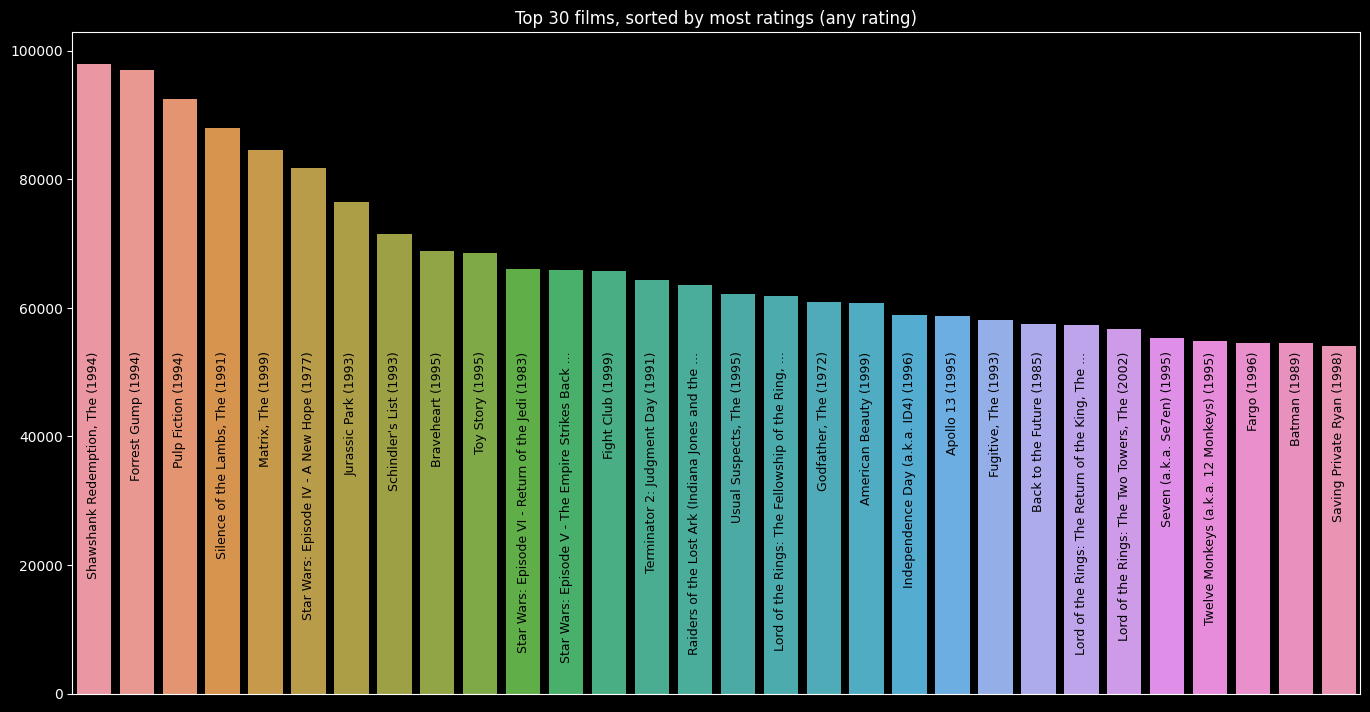

In [118]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

def plot_most_ratings(n):
    top = df_ratings['movieId'].value_counts().head(n).index

    title_name = []
    for i in top:
        title = df_movies[df_movies['movieId'] == i]
        title_name.append(title['title'].to_string(index=False))

    rcParams['figure.figsize'] = 14,7
    sns.barplot(x=title_name, y=df_ratings['movieId'].value_counts().head(n))

    # Testing stuff TODO: how to adjust starting position for text labels on bars ??? now they line up at the end of the last character, should line up at first
    plt.tick_params(labelsize = 9, length = -250, axis='x')
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.title(f'Top {n} films, sorted by most ratings (any rating)')
    plt.ylabel('')

    if my_time == 'night':
        font_color='#000000'
    else:
        font_color='#FFFFFF'
        
    plt.tick_params(axis='x', colors=font_color)

    plt.show()

plot_most_ratings(30)

## Movies by year

In [119]:
import re
# remove '(year)' from title and add to new col
df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)', expand=False) # find 4 digits within parenthesis
df_movies['title'] = df_movies['title'].str.replace(r' \(\d{4}\)', '', regex=True) # remove year from title column

In [120]:
print(df_movies['year'].value_counts())
df_movies.head()

2015    2312
2014    2297
2016    2219
2013    2187
2012    2019
        ... 
1887       1
1878       1
1874       1
1893       1
1883       1
Name: year, Length: 134, dtype: int64


,movieId,title,year
0,1,Toy Story,1995
1,2,Jumanji,1995
2,3,Grumpier Old Men,1995
3,4,Waiting to Exhale,1995
4,5,Father of the Bride Part II,1995


In [121]:
df_sorted = df_movies.sort_values('year')

# Find the first and last movie
first_movie = df_sorted.iloc[0]
last_movie = df_sorted.iloc[-1]

print(f'{first_movie}\n\n{last_movie}')

movieId              148054
title      Passage de Venus
year                   1874
Name: 37886, dtype: object

movieId             193657
title      A Kiss of Chaos
year                   NaN
Name: 57993, dtype: object


In [122]:
df_movies['year'].isna().sum()

327

Ohhh shit. 327 movies with missing year data.

In [123]:
df_missing_year = df_movies[df_movies['year'].isna()]

df_missing_year

,movieId,title,year
10023,32930,Category 6: Day of Destruction,NaN
10613,40697,Babylon 5,NaN
15719,79607,"Millions Game, The (Das Millionenspiel)",NaN
17444,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",NaN
22651,107434,Diplomatic Immunity (2009– ),NaN
...,...,...,...
57504,192339,The Sign of Three,NaN
57674,192829,Parwaaz Hai Junoon,NaN
57789,193149,¿Qué te juegas?,NaN
57903,193443,Wall,NaN


Some of the titles have missing years because they techinally are mini series, for example *Babylon 5* is a <a href="https://en.wikipedia.org/wiki/Babylon_5">space opera with 100+ episodes</a>, and have a span over many years.

But some movies, like *¿Qué te juegas?* just don't seem to have year within parenthesis, altough <a href="https://es.wikipedia.org/wiki/¿Qué_te_juegas%3F">it was released in 2019</a>

Parwaaz Hai Junoon, movie, 2018
A Kiss of Chaos, movie, 2009

But here's something interesting: *The Sign of Three* seems to be an episode of TV series Sherlock, aired 2014. That's odd. Maybe there are other TV-series episodes as well in the dataset. That might be an issue.

<h3>

The best thing to do, tbh, would be to manually check all 327 rows.

The next best thing would be to scrape another database for year data.

The third best thing would be to discard all 327 rows.

The fourth best thing would be just to carry on and leave it for later.

</h3>


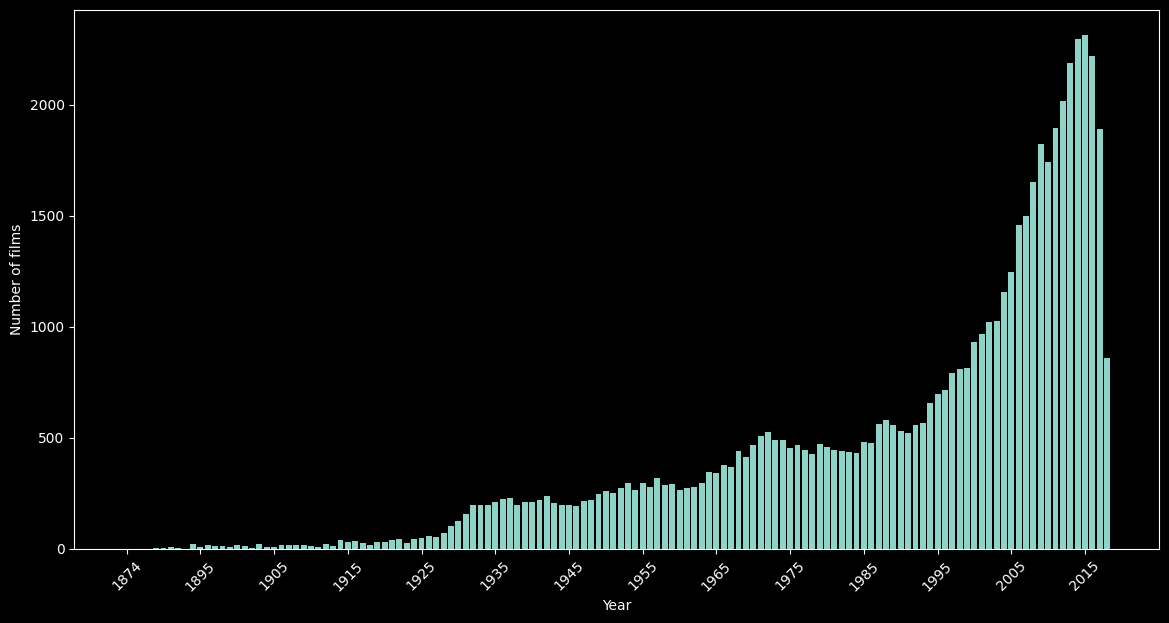

In [124]:
# count the number of movies released each year, regardless of missing year values
year_counts = df_movies.groupby('year')['movieId'].count()
fig, ax = plt.subplots()
ax.bar(year_counts.index, year_counts.values)
ax.set_xlabel('Year')
ax.set_ylabel('Number of films')

n = 10
ax.set_xticks(year_counts.index[::n])
ax.set_xticklabels(year_counts.index[::n], rotation=45)


plt.show()

I guess the data was collected in mid or early 2018, since no movies past 2018 are present, and 2018 looks very small.
Let's check.

In [125]:
df_sorted.iloc[-df_movies['year'].isna().sum()-1] 

movieId    193886
title        Leal
year         2018
Name: 58097, dtype: object

In [126]:
links='../Data/ml-latest/links.csv'
df_links=pd.read_csv(links, usecols=['movieId','imdbId','tmdbId'],
    dtype={
        'movieId':'int32',
        'imdbId':'int32',
        'tmdbId':'float32'}).fillna(0).astype({'tmdbId': 'int32'}) #<- NA values in column 2, must import as float, fillna and then convert to int

for i in df_missing_year['movieId']:
    print(df_links.loc[df_links['movieId'] == i])

       movieId  imdbId  tmdbId
10023    32930  428144   32128
       movieId  imdbId  tmdbId
10613    40697  105946       0
       movieId  imdbId  tmdbId
15719    79607   66079    5465
       movieId   imdbId  tmdbId
17444    87442  1710542   57536
       movieId   imdbId  tmdbId
22651   107434  1450364       0
       movieId   imdbId  tmdbId
24089   112406  3778744       0
       movieId   imdbId  tmdbId
24344   113190  3793686  261813
       movieId   imdbId  tmdbId
24885   115133  3096440  298573
       movieId  imdbId  tmdbId
27870   123619   88248  297668
       movieId  imdbId  tmdbId
28754   125571   99311  279979
       movieId  imdbId  tmdbId
28779   125632  495225  318359
       movieId   imdbId  tmdbId
28862   125958  1307789   76162
       movieId   imdbId  tmdbId
29043   126438  2740874  224293
       movieId  imdbId  tmdbId
29166   127005  103301  217590
       movieId   imdbId  tmdbId
29688   128612  4358230  319999
       movieId   imdbId  tmdbId
29740   128734  443868

Here I wanna run some API calls from tmdb or imdb. Imdb doesn't have a free API but tmdb does. Or i could webscrape. Idk.
Imdb have more available data, but we could find at least some missing year values using tmdb.

But if we search for title intstead, we could probably find more results, as tmdb have been updated since 2018.

In [127]:
from apikey import get_key
key = get_key()[0]

#https://www.themoviedb.org/authenticate/{REQUEST_TOKEN}

## User tags

In [128]:
# because of the issue with missing year values I think we will redo the dataframes add the tags
tags='../Data/ml-latest/tags.csv'
df_tags=pd.read_csv(tags, usecols=['movieId', 'tag'])

df_tags.value_counts()

movieId  tag            
260      sci-fi             1050
         Science Fiction     475
         classic             411
         space               410
         space adventure     401
                            ... 
27075    campy                 1
         butler                1
         addams family         1
         Dave Payne            1
193868   romance               1
Length: 481178, dtype: int64

In [135]:
#df_movies=pd.read_csv(movies, usecols=['movieId','title'], dtype={'movieId':'int32','title':'str'})
#df_movies=df_movies.merge(df_tags, how='outer', on='movieId')

df_movies.head(20)

,movieId,title,tag
0,1,Toy Story (1995),animated
1,1,Toy Story (1995),buddy movie
2,1,Toy Story (1995),Cartoon
3,1,Toy Story (1995),cgi
4,1,Toy Story (1995),comedy
5,1,Toy Story (1995),computer animation
6,1,Toy Story (1995),family
7,1,Toy Story (1995),friendship
8,1,Toy Story (1995),kids
9,1,Toy Story (1995),toy


Hm, I wonder if all tags should be one row for every movie. Well as long as it's not a problem let's keep it as is.

For example:

In [136]:
#What movie do you want to watch?'
user_input = 'romance'

print(f'Ok! Searching for movie with tag: {user_input}')

def find_by_tag(tag, all_results=False, select_random=False):
    match = df_movies.loc[df_movies['tag'] == tag].drop_duplicates().values
    if len(match) == 0:
        print(f'No movies tagged by {tag}, try being more specific.')
    else:
        s = 's'
        if len(match) < 2: s = ''
        print(f'Found {tag} in {len(match)} movie{s}! \n')

    if all_results:
        print(match)

    if select_random:
        n = np.random.randint(len(match))
        print(f'How about watching {match[n][1]}?')

find_by_tag(user_input, all_results=False, select_random=True)


Ok! Searching for movie with tag: romance
Found romance in 1170 movies! 

How about watching Centurion (2010)?


In [140]:
find_by_tag('action', all_results=False, select_random=True)

Found action in 910 movies! 

How about watching Singam (2010)?


In [141]:
# but there's some issues with the current tags, for example:
find_by_tag('lame')

Found lame in 41 movies! 



I mean, that's extremely subjective, and definitely not a a genre. So the tags need some cleaning.
Just for giggles, let's see whats in there.

In [138]:
find_by_tag('crap'), find_by_tag('shit'), find_by_tag('the best', all_results=True), find_by_tag('orange', all_results=True)

Found crap in 33 movies! 

Found shit in 16 movies! 

Found the best in 1 movie! 

[[47 'Seven (a.k.a. Se7en) (1995)' 'the best']]
Found orange in 3 movies! 

[[260 'Star Wars: Episode IV - A New Hope (1977)' 'orange']
 [2888 'Drive Me Crazy (1999)' 'orange']
 [37626 "It's a Gift (1934)" 'orange']]


(None, None, None, None)

In [139]:
# uh, ok yeah, the tags are so dirty
find_by_tag('asd', all_results=True)

Found asd in 2 movies! 

[[593 'Silence of the Lambs, The (1991)' 'asd']
 [1196 'Star Wars: Episode V - The Empire Strikes Back (1980)' 'asd']]


TODO: Clean tags. Maybe filter out everything and just keep some established genres.

So what if people are like, "i want to watch lesser known movies" then they'd perhaps want to watch movies with no ratings, maybe(?). So we can't just drop the movies just because they have no ratings. Instead I think we should remove ratings from the most popular movies.

Like, wouldn't it make sense to first try to find some patterns in users?

## 1.2 Skapa gles matris

Likt i videon i uppgift 1.0 skapade du en pivottabell av dataframet med index: "movieId", columns: "userId" och values: "ratings". Denna pivottabell är dock "dyr" att skapa och förmodligen kommer inte din dator att klara av skapa den om du inte filtrerar bort viss data. Fundera ut ett lämpligt sätt att filtrera ditt dataset, pröva dig fram och motivera.
Skapa en gles (sparse) matris av denna pivottabell ```scipy.sparse.csc_matrix()```



Ok, so we back at this. Let's think about it.
Theoretically, we could remove ALL userId:s and just keep the ratings, maybe just the mean rating of every movie. *However* if we do want to recommend movies based on **user similarity**, this can't be done.

Another idea is to remove *some* of the userId:s, or *some* of the ratings.

Yet another idea is to use some kind of slice and dice or chunk method.

Well, one thing is for sure. We don't need 100,000 ratings for any movie.


In [ ]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process

## 1.3 Recommender system    

Skapa ett recommender system med KNN och låt systemet ta input från användaren och skriva ut top 5 rekommenderade filmerna, baserat på användarens sökquery. Observera att det finns ett logiskt fel i videon som gör att rekommendationerna inte blir så bra, försök hitta felet och åtgärda det.

a) Beskriv med ord hur dit system funkar

b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. Glöm inte källhänvisa